## Making a map of the Philippines

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["font.family"] = "Arial"

c:\Users\Ian\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


We'll get the data from the world loans data from GeoPandas.

In [2]:
nov_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202311.csv")
nov_data

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,...,sys.sunset,weather.id,weather.main,weather.description,weather.icon,extraction_date_time,city_name,sys.type,sys.id,rain.1h
0,10000.0,2023-11-06 15:35:43+08:00,119.9811,16.1561,30.52,36.34,30.52,30.52,1009.0,70.0,...,2023-11-06 17:28:29+08:00,804.0,Clouds,overcast clouds,04d,2023-11-06 15:45:05.122654+08:00,Alaminos,NaN,NaN,NaN
1,10000.0,2023-11-06 15:45:07+08:00,120.5833,15.1500,35.25,42.25,35.25,35.25,1010.0,55.0,...,2023-11-06 17:27:17+08:00,802.0,Clouds,scattered clouds,03d,2023-11-06 15:45:07.511028+08:00,Angeles City,1.0,8152.0,NaN
2,10000.0,2023-11-06 15:45:09+08:00,121.1900,15.6181,29.74,34.87,29.74,29.74,1010.0,72.0,...,2023-11-06 17:24:18+08:00,801.0,Clouds,few clouds,02d,2023-11-06 15:45:09.096131+08:00,Antipolo,NaN,NaN,NaN
3,10000.0,2023-11-06 15:45:11+08:00,123.5085,12.2285,29.01,34.34,29.01,29.01,1009.0,78.0,...,2023-11-06 17:19:03+08:00,803.0,Clouds,broken clouds,04d,2023-11-06 15:45:11.662533+08:00,Bacolod,NaN,NaN,NaN
4,10000.0,2023-11-06 15:45:12+08:00,120.9290,14.4590,32.05,39.05,30.58,33.99,1009.0,72.0,...,2023-11-06 17:26:44+08:00,801.0,Clouds,few clouds,02d,2023-11-06 15:45:12.970057+08:00,Bacoor,2.0,2005706.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,10000.0,2023-11-24 00:04:56+08:00,124.5725,11.1089,25.08,26.05,25.08,25.08,1009.0,92.0,...,2023-11-24 17:15:13+08:00,800.0,Clear,clear sky,01n,2023-11-24 00:04:56.733308+08:00,Valencia,NaN,NaN,NaN
14467,10000.0,2023-11-24 00:04:59+08:00,120.9667,14.7000,27.11,30.72,26.13,27.28,1011.0,87.0,...,2023-11-24 17:24:04+08:00,804.0,Clouds,overcast clouds,04n,2023-11-24 00:04:59.184542+08:00,Valenzuela,2.0,2008256.0,NaN
14468,10000.0,2023-11-24 00:05:00+08:00,123.0778,10.9000,26.65,26.65,26.65,26.65,1009.0,89.0,...,2023-11-24 17:21:31+08:00,801.0,Clouds,few clouds,02n,2023-11-24 00:05:00.763382+08:00,Victorias,NaN,NaN,NaN
14469,10000.0,2023-11-24 00:05:03+08:00,120.3869,17.5747,25.50,26.30,25.50,25.50,1011.0,84.0,...,2023-11-24 17:21:46+08:00,802.0,Clouds,scattered clouds,03n,2023-11-24 00:05:03.247071+08:00,Vigan,NaN,NaN,NaN


Let's get the coordinates

In [3]:
coords = nov_data.iloc[:276 , 2:4] # get only longitude and latitude until 277th row because the is the 
coords

,coord.lon,coord.lat
0,119.9811,16.1561
1,120.5833,15.1500
2,121.1900,15.6181
3,123.5085,12.2285
4,120.9290,14.4590
...,...,...
271,124.5725,11.1089
272,120.9667,14.7000
273,123.0778,10.9000
274,120.3869,17.5747


Converting them into something that GeoPandas can use:

In [4]:
geo_coords = gpd.GeoDataFrame(coords, geometry= gpd.points_from_xy(coords['coord.lon'], coords['coord.lat']))
geo_coords

,coord.lon,coord.lat,geometry
0,119.9811,16.1561,POINT (119.98110 16.15610)
1,120.5833,15.1500,POINT (120.58330 15.15000)
2,121.1900,15.6181,POINT (121.19000 15.61810)
3,123.5085,12.2285,POINT (123.50850 12.22850)
4,120.9290,14.4590,POINT (120.92900 14.45900)
...,...,...,...
271,124.5725,11.1089,POINT (124.57250 11.10890)
272,120.9667,14.7000,POINT (120.96670 14.70000)
273,123.0778,10.9000,POINT (123.07780 10.90000)
274,120.3869,17.5747,POINT (120.38690 17.57470)


The data for the lines of the whole world is given by:

In [5]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Let's try to plot it

<AxesSubplot:>

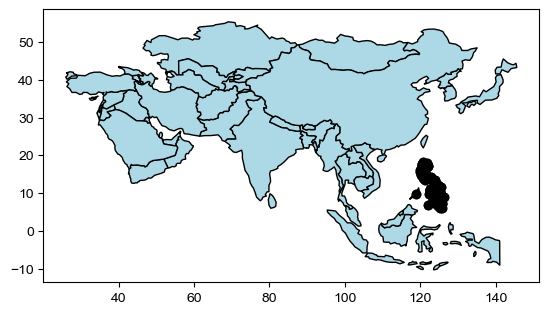

In [6]:
axis = world_data[world_data.continent=='Asia'].plot(color='lightblue', edgecolor='black')
geo_coords.plot(ax=axis, color='black')

We can zoom in over to any country by having

<center>

```world_data[world_data.name=='country_name']```

</center>

Text(0.5, 1.0, 'Locations of Weather Datapoints')

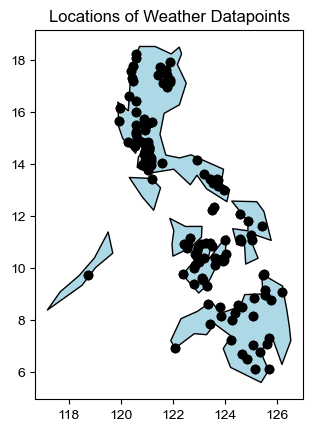

In [7]:
axis = world_data[world_data.name=='Philippines'].plot(color='lightblue', edgecolor='black')
geo_coords.plot(ax=axis, color='black')
plt.title('Locations of Weather Datapoints')

Let's make this more aesthetically pleasing. 

Text(0.5, 1.0, 'Locations of Weather Datapoints')

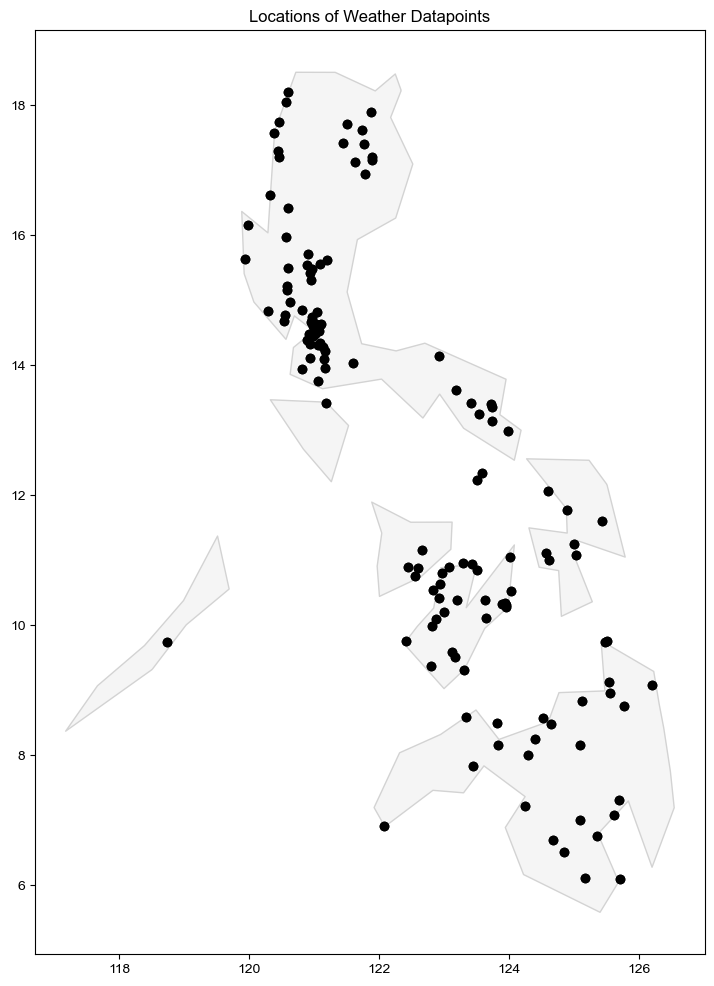

In [9]:
axis = world_data[world_data.name=='Philippines'].plot(figsize=(12,12), color='whitesmoke', edgecolor='lightgray')
geo_coords.plot(ax=axis, color='black')
plt.title('Locations of Weather Datapoints')

However, we see that the Philippine map is very lowres. Let's try to load in a highres Philippine map. 

In [12]:
filepath = r'C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Maps\gadm41_PHL.gpkg'
PHL = gpd.read_file(filepath)

Let's check if this is the real thing

In [13]:
PHL

,GID_0,COUNTRY,geometry
0,PHL,Philippines,"MULTIPOLYGON (((125.38222 5.37056, 125.38194 5..."


Plotting it, we have

Text(0.5, 1.0, 'Locations of Weather Datapoints')

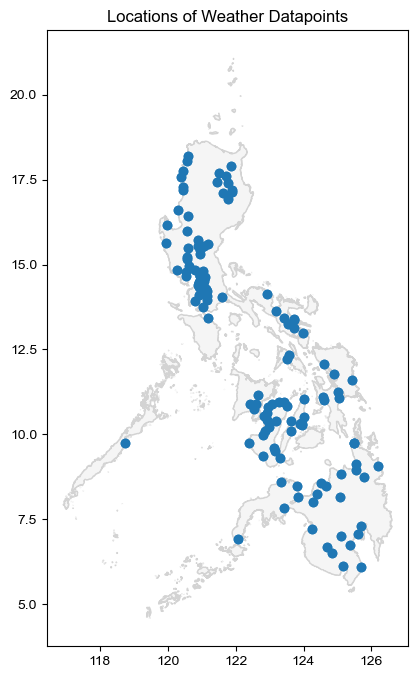

In [20]:
ax1 = PHL.plot(figsize=(8,8), color='whitesmoke', edgecolor='lightgray')
geo_coords.plot(ax=ax1, color='tab:blue')
plt.title('Locations of Weather Datapoints')